In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle
import joblib
from sklearn.model_selection import train_test_split
from scipy.stats import skew
import os
import warnings
warnings.filterwarnings("ignore")


In [76]:
df1=pd.read_csv(r"C:\Users\ADMIN\Desktop\DATA SCIENCE\PROJECT\SINGAPORE SALES PRED\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2=pd.read_csv(r"C:\Users\ADMIN\Desktop\DATA SCIENCE\PROJECT\SINGAPORE SALES PRED\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3=pd.read_csv(r"C:\Users\ADMIN\Desktop\DATA SCIENCE\PROJECT\SINGAPORE SALES PRED\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4=pd.read_csv(r"C:\Users\ADMIN\Desktop\DATA SCIENCE\PROJECT\SINGAPORE SALES PRED\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5=pd.read_csv(r"C:\Users\ADMIN\Desktop\DATA SCIENCE\PROJECT\SINGAPORE SALES PRED\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [77]:
df=pd.concat([df1,df2,df3,df4,df5])

In [ ]:
from ydata_profiling import ProfileReport
#automate eda
pr=ProfileReport(df)
pr

In [78]:
df.shape

(926819, 11)

In [79]:
df.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN


In [80]:
df[["storey_range_start","storey_range_end"]] = df["storey_range"].str.split(" TO ",expand=True)
df.drop("storey_range",axis=1,inplace=True)
df['storey_range_start']=pd.to_numeric(df['storey_range_start'])
df['storey_range_end']=pd.to_numeric(df['storey_range_end'])

In [81]:
df[['resale_year','resale_month']] = df["month"].str.split("-",expand=True)
df.drop("month",axis=1,inplace=True)
df['resale_year']=pd.to_numeric(df['resale_year'])
df['resale_month']=pd.to_numeric(df['resale_month'])

In [11]:
df.columns

Index(['town', 'flat_type', 'block', 'street_name', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'remaining_lease',
       'storey_range_start', 'storey_range_end', 'resale_year',
       'resale_month'],
      dtype='object')

In [82]:
df.flat_type.unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [83]:
df.flat_type = df['flat_type'].str.replace("MULTI-GENERATION","MULTI GENERATION")

In [84]:
df.flat_type.unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [85]:
flat_model=df.flat_model.unique()

In [86]:
flat_model

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [87]:
flat_model=sorted(flat_model)
flat_model

['2-ROOM',
 '2-room',
 '3Gen',
 'APARTMENT',
 'Adjoined flat',
 'Apartment',
 'DBSS',
 'IMPROVED',
 'IMPROVED-MAISONETTE',
 'Improved',
 'Improved-Maisonette',
 'MAISONETTE',
 'MODEL A',
 'MODEL A-MAISONETTE',
 'MULTI GENERATION',
 'Maisonette',
 'Model A',
 'Model A-Maisonette',
 'Model A2',
 'Multi Generation',
 'NEW GENERATION',
 'New Generation',
 'PREMIUM APARTMENT',
 'Premium Apartment',
 'Premium Apartment Loft',
 'Premium Maisonette',
 'SIMPLIFIED',
 'STANDARD',
 'Simplified',
 'Standard',
 'TERRACE',
 'Terrace',
 'Type S1',
 'Type S2']

In [88]:
df.flat_model=df['flat_model'].str.capitalize()

In [89]:
df.flat_model.unique()

array(['Improved', 'New generation', 'Model a', 'Standard', 'Simplified',
       'Model a-maisonette', 'Apartment', 'Maisonette', 'Terrace',
       '2-room', 'Improved-maisonette', 'Multi generation',
       'Premium apartment', 'Adjoined flat', 'Premium maisonette',
       'Model a2', 'Dbss', 'Type s1', 'Type s2', 'Premium apartment loft',
       '3gen'], dtype=object)

In [90]:
df.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [91]:
df.town=df['town'].str.capitalize()
df.street_name=df['street_name'].str.capitalize()
df.flat_type=df['flat_type'].str.capitalize()

In [92]:
df.remaining_lease.tail(10)

180606    92 years 10 months
180607    62 years 10 months
180608    63 years 04 months
180609    62 years 05 months
180610    63 years 06 months
180611    63 years 03 months
180612    63 years 02 months
180613    67 years 02 months
180614    62 years 05 months
180615    62 years 09 months
Name: remaining_lease, dtype: object

In [93]:
#converting the remaining lease columns
def convert_years_str(row):
    if pd.notna(row) and isinstance(row,str):
        split_yr_month = row.split()
        year = float(split_yr_month[0])
        month = float(split_yr_month[2] if len(split_yr_month)>2 else 0)
        year = year+(month/12)
        return year
    return row 

df.remaining_lease = df['remaining_lease'].apply(convert_years_str)

In [94]:
df.remaining_lease.tail(10)

180606    92.833333
180607    62.833333
180608    63.333333
180609    62.416667
180610    63.500000
180611    63.250000
180612    63.166667
180613    67.166667
180614    62.416667
180615    62.750000
Name: remaining_lease, dtype: float64

In [95]:
df.isna().sum()

town                        0
flat_type                   0
block                       0
street_name                 0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
storey_range_start          0
storey_range_end            0
resale_year                 0
resale_month                0
dtype: int64

In [96]:
# filling the null values using mode
df.remaining_lease.fillna(df['remaining_lease'].mode()[0],inplace =True)

In [97]:
df.isna().sum()

town                   0
flat_type              0
block                  0
street_name            0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
storey_range_start     0
storey_range_end       0
resale_year            0
resale_month           0
dtype: int64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926819 entries, 0 to 180615
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 926819 non-null  object 
 1   flat_type            926819 non-null  object 
 2   block                926819 non-null  object 
 3   street_name          926819 non-null  object 
 4   floor_area_sqm       926819 non-null  float64
 5   flat_model           926819 non-null  object 
 6   lease_commence_date  926819 non-null  int64  
 7   resale_price         926819 non-null  float64
 8   remaining_lease      926819 non-null  float64
 9   storey_range_start   926819 non-null  int64  
 10  storey_range_end     926819 non-null  int64  
 11  resale_year          926819 non-null  int64  
 12  resale_month         926819 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 99.0+ MB


In [99]:
df['block']=pd.to_numeric(df['block'],errors='coerce')
df['block'].isna().sum()

124356

In [100]:
# filling the null values using mode
df['block'].fillna(df['block'].mode()[0],inplace =True)

In [101]:
df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,storey_range_start,storey_range_end,resale_year,resale_month
0,Ang mo kio,1 room,309.0,Ang mo kio ave 1,31.0,Improved,1977,9000.0,68.000000,10,12,1990,1
1,Ang mo kio,1 room,309.0,Ang mo kio ave 1,31.0,Improved,1977,6000.0,68.000000,4,6,1990,1
2,Ang mo kio,1 room,309.0,Ang mo kio ave 1,31.0,Improved,1977,8000.0,68.000000,10,12,1990,1
3,Ang mo kio,1 room,309.0,Ang mo kio ave 1,31.0,Improved,1977,6000.0,68.000000,7,9,1990,1
4,Ang mo kio,3 room,216.0,Ang mo kio ave 1,73.0,New generation,1976,47200.0,68.000000,4,6,1990,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180611,Yishun,Executive,360.0,Yishun ring rd,145.0,Apartment,1988,735000.0,63.250000,4,6,2024,5
180612,Yishun,Executive,2.0,Yishun ring rd,146.0,Maisonette,1988,815888.0,63.166667,1,3,2024,5
180613,Yishun,Executive,292.0,Yishun st 22,169.0,Apartment,1992,1032000.0,67.166667,1,3,2024,5
180614,Yishun,Executive,643.0,Yishun st 61,142.0,Apartment,1987,800000.0,62.416667,10,12,2024,5


In [102]:
file_path =r"C:\Users\ADMIN\Desktop\DATA SCIENCE\PROJECT\SINGAPORE SALES PRED/processed_singapore_flat.csv"

if not os.path.exists(file_path):
    df.to_csv(file_path,index=False)
    print("File saved sucessfully...!")
else:
    print("File already exists. skip saving...")

File saved sucessfully...!


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926819 entries, 0 to 180615
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 926819 non-null  object 
 1   flat_type            926819 non-null  object 
 2   block                926819 non-null  float64
 3   street_name          926819 non-null  object 
 4   floor_area_sqm       926819 non-null  float64
 5   flat_model           926819 non-null  object 
 6   lease_commence_date  926819 non-null  int64  
 7   resale_price         926819 non-null  float64
 8   remaining_lease      926819 non-null  float64
 9   storey_range_start   926819 non-null  int64  
 10  storey_range_end     926819 non-null  int64  
 11  resale_year          926819 non-null  int64  
 12  resale_month         926819 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 99.0+ MB


In [105]:
df.town.unique(),df.street_name.unique()

(array(['Ang mo kio', 'Bedok', 'Bishan', 'Bukit batok', 'Bukit merah',
        'Bukit timah', 'Central area', 'Choa chu kang', 'Clementi',
        'Geylang', 'Hougang', 'Jurong east', 'Jurong west',
        'Kallang/whampoa', 'Marine parade', 'Queenstown', 'Sengkang',
        'Serangoon', 'Tampines', 'Toa payoh', 'Woodlands', 'Yishun',
        'Lim chu kang', 'Sembawang', 'Bukit panjang', 'Pasir ris',
        'Punggol'], dtype=object),
 array(['Ang mo kio ave 1', 'Ang mo kio ave 3', 'Ang mo kio ave 4',
        'Ang mo kio ave 10', 'Ang mo kio ave 5', 'Ang mo kio ave 8',
        'Ang mo kio ave 6', 'Ang mo kio ave 9', 'Ang mo kio ave 2',
        'Bedok reservoir rd', 'Bedok nth st 3', 'Bedok sth rd',
        'New upp changi rd', 'Bedok nth rd', 'Bedok sth ave 1',
        'Chai chee rd', 'Chai chee dr', 'Bedok nth ave 4',
        'Bedok sth ave 3', 'Bedok sth ave 2', 'Bedok nth st 2',
        'Bedok nth st 4', 'Bedok nth ave 2', 'Bedok nth ave 3',
        'Bedok nth ave 1', 'Bedok nth st

In [106]:
#converting the categorical to numerical 
labelencoder=LabelEncoder()
df.town=labelencoder.fit_transform(df['town'])
df.street_name=labelencoder.fit_transform(df['street_name'])

In [107]:
df.town.unique(),df.street_name.unique()

(array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 19, 21,
        22, 23, 24, 25, 26, 15, 20,  5, 17, 18]),
 array([ 13,  16,  17,  14,  18,  20,  19,  21,  15,  45,  42,  50, 340,
         39,  47, 115, 114,  38,  49,  48,  41,  43,  36,  37,  35,  40,
        116, 437, 425,  70,  86,  84,  71,  68,  67, 200,  65,  75,  66,
        448, 487,  52, 488, 166, 490, 236, 199, 228,  90, 198,  92, 489,
        178, 292, 385, 226, 197, 241, 248, 235, 294, 335, 492, 299, 298,
        175, 382, 181, 242, 345, 424, 397, 505, 510, 380,  97, 393, 392,
         30, 438, 509, 484, 486, 143, 512, 142, 145, 144, 141, 513, 151,
        152, 149,  99, 146, 150, 139, 322, 246, 192, 176, 434,   5, 189,
        163, 366, 196,  31, 238, 191, 177, 208, 210, 205, 218, 206, 318,
        216, 212, 217, 483, 255, 260, 256, 257, 258, 259, 347, 579, 201,
        227,  61,  60,  62, 271, 268, 261, 269, 233, 441, 342, 186,  33,
        514, 504,  51, 517, 320, 285, 188, 167, 346, 291, 232, 338, 501

In [108]:
df.flat_model.unique(),df.flat_type.unique()

(array(['Improved', 'New generation', 'Model a', 'Standard', 'Simplified',
        'Model a-maisonette', 'Apartment', 'Maisonette', 'Terrace',
        '2-room', 'Improved-maisonette', 'Multi generation',
        'Premium apartment', 'Adjoined flat', 'Premium maisonette',
        'Model a2', 'Dbss', 'Type s1', 'Type s2', 'Premium apartment loft',
        '3gen'], dtype=object),
 array(['1 room', '3 room', '4 room', '5 room', '2 room', 'Executive',
        'Multi generation'], dtype=object))

In [109]:
ordianencoder=OrdinalEncoder()
df.flat_model=ordianencoder.fit_transform(df[['flat_model']])
df.flat_type=ordianencoder.fit_transform(df[['flat_type']])

In [110]:
df.flat_model.unique(),df.flat_type.unique()

(array([ 5., 12.,  8., 17., 16.,  9.,  3.,  7., 18.,  0.,  6., 11., 13.,
         2., 15., 10.,  4., 19., 20., 14.,  1.]),
 array([0., 2., 3., 4., 1., 5., 6.]))

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926819 entries, 0 to 180615
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 926819 non-null  int32  
 1   flat_type            926819 non-null  float64
 2   block                926819 non-null  float64
 3   street_name          926819 non-null  int32  
 4   floor_area_sqm       926819 non-null  float64
 5   flat_model           926819 non-null  float64
 6   lease_commence_date  926819 non-null  int64  
 7   resale_price         926819 non-null  float64
 8   remaining_lease      926819 non-null  float64
 9   storey_range_start   926819 non-null  int64  
 10  storey_range_end     926819 non-null  int64  
 11  resale_year          926819 non-null  int64  
 12  resale_month         926819 non-null  int64  
dtypes: float64(6), int32(2), int64(5)
memory usage: 91.9 MB


In [112]:
#skewness
def plot(df,column):
    
  #distplot
    plt.figure(figsize=(15,4))
    plt.subplot(1,4,1)
    sns.distplot(df[column])
    plt.title("distplot for"+" "+column)

  #histogram plot

    plt.subplot(1,4,2)
    sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
    plt.title("histogram plot for"+" "+column)

  #boxplot

    plt.subplot(1,4,3)
    sns.boxplot(df, x=column)
    plt.title("Box plot for"+" "+column)
    
  #violin plot
    plt.subplot(1,4,4)
    sns.violinplot(df,x=column)
    plt.title("Violin plot for"+" "+column)
    

In [41]:
cols=df.columns
cols

Index(['town', 'flat_type', 'block', 'street_name', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'remaining_lease',
       'storey_range_start', 'storey_range_end', 'resale_year',
       'resale_month'],
      dtype='object')

### EDA

In [113]:
print('Skewness:', skew(df['town']))
print('Skewness:', skew(df['flat_type']))
print('Skewness:', skew(df['block']))
print('Skewness:', skew(df['street_name']))
print('Skewness:', skew(df['floor_area_sqm']))
print('Skewness:', skew(df['flat_model']))
print('Skewness:', skew(df['lease_commence_date']))
print('Skewness:', skew(df['resale_price']))
print('Skewness:', skew(df['remaining_lease']))
print('Skewness:', skew(df['storey_range_start']))
print('Skewness:', skew(df['storey_range_end']))
print('Skewness:', skew(df['resale_year']))
print('Skewness:', skew(df['resale_month']))

Skewness: -0.08587735523145237
Skewness: 0.3881681078412202
Skewness: 0.6879999089486514
Skewness: 0.022982422227428963
Skewness: 0.366157706027709
Skewness: 0.5002407554977054
Skewness: 0.6462771087999098
Skewness: 0.9403570230847526
Skewness: 1.8758568004041871
Skewness: 1.3508154985235328
Skewness: 1.3515132382867237
Skewness: 0.294434412642387
Skewness: -0.027837762424136152


In [42]:
for i in cols:
    plot(df,i)

In [43]:
# Skewness in  storey_range_start,storey_range_end,resale price

In [114]:
#Removing the skewness
def remove_skew(row):
    row=np.log(row)
    return row
    

In [115]:
skewedcols=['resale_price','storey_range_start','storey_range_end']


In [116]:
for i in skewedcols:
    df[i]=df[i].apply(remove_skew)
    print('Skewness:', skew(df[i]))

Skewness: -0.9249267198879335
Skewness: -0.6659469529624027
Skewness: -0.22928137254957875


In [47]:
for i in skewedcols:
    plot(df,i)

## Treating the Outliers


In [117]:
Q1 = df['storey_range_end'].quantile(0.25)
Q3 = df['storey_range_end'].quantile(0.75)
IQR = Q3 - Q1

#lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['storey_range_end']=df['storey_range_end'].clip(lower_bound,upper_bound)

plot(df,'storey_range_end')

In [118]:
Q1 = df['storey_range_start'].quantile(0.25)
Q3 = df['storey_range_start'].quantile(0.75)
IQR = Q3 - Q1

#lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['storey_range_start']=df['storey_range_start'].clip(lower_bound,upper_bound)
plot(df,'storey_range_start')


In [119]:
Q1 = df['floor_area_sqm'].quantile(0.25)
Q3 = df['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1

#lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['floor_area_sqm']=df['floor_area_sqm'].clip(lower_bound,upper_bound)
plot(df,'floor_area_sqm')

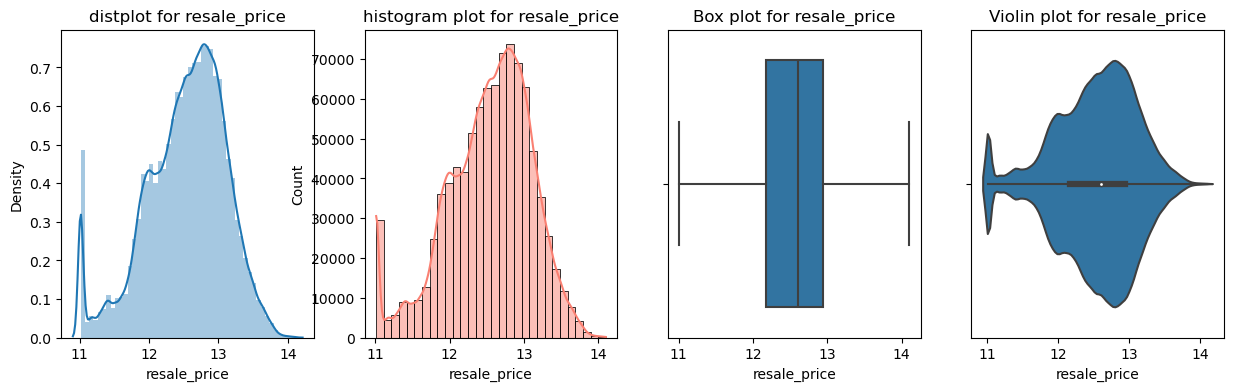

In [120]:
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1

#lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['resale_price']=df['resale_price'].clip(lower_bound,upper_bound)
plot(df,'resale_price')

In [121]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
town,926819.0,13.652880,8.795791,0.000000,5.000000,13.000000,23.000000,26.000000
flat_type,926819.0,3.013886,0.948403,0.000000,2.000000,3.000000,4.000000,6.000000
block,926819.0,292.741270,262.643874,1.000000,56.000000,224.000000,484.000000,980.000000
street_name,926819.0,285.964761,181.605421,0.000000,122.000000,278.000000,460.000000,583.000000
floor_area_sqm,926819.0,95.663894,25.727678,28.000000,73.000000,93.000000,113.000000,173.000000
flat_model,926819.0,8.990056,3.861574,0.000000,5.000000,8.000000,12.000000,20.000000
lease_commence_date,926819.0,1988.271432,10.657764,1966.000000,1981.000000,1986.000000,1996.000000,2022.000000
resale_price,926819.0,12.529594,0.577633,11.011259,12.170445,12.601487,12.943237,14.102424
remaining_lease,926819.0,69.525121,7.088895,41.500000,68.000000,68.000000,68.000000,97.750000
storey_range_start,926819.0,1.575617,0.900675,0.011858,1.386294,1.945910,2.302585,3.677021


<Axes: >

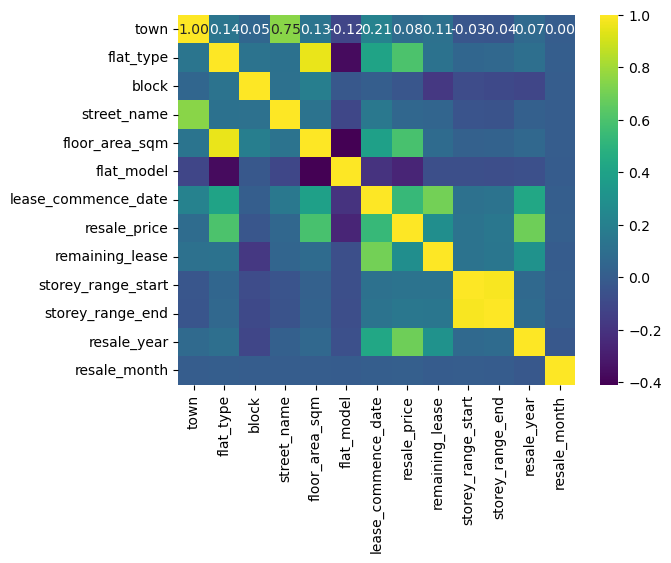

In [122]:
corelation=df.corr()
sns.heatmap(corelation, annot=True, cmap="viridis",fmt=".2f")

In [123]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [124]:
df.duplicated().sum()

0

In [125]:
df.drop("remaining_lease",axis =1,inplace=True)

In [126]:
df.shape

(923496, 12)

In [127]:
file_path =r"C:\Users\ADMIN\Desktop\DATA SCIENCE\PROJECT\SINGAPORE SALES PRED\final_flat.csv"

if not os.path.exists(file_path):
    df.to_csv(file_path,index=False)
    print("File saved successfully...!")
else:
    print("File exist, skipped saving")

File exist, skipped saving


## Model Selection

In [128]:
def select_model(df,algorithm,target_column):
    
    X = df.drop(target_column,axis=1)
    y = df[target_column]
    metrics_list = []
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    
    model=algorithm().fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    
    train_mse=mean_squared_error(y_train,y_pred_train)
    train_rmse=np.sqrt(train_mse)
    train_mae=mean_absolute_error(y_train,y_pred_train)
    train_r2=r2_score(y_train,y_pred_train)
    
    test_mse=mean_squared_error(y_test,y_pred_test)
    test_rmse=np.sqrt(test_mse)
    test_mae=mean_absolute_error(y_test,y_pred_test)
    test_r2=r2_score(y_test,y_pred_test)
    
    metrics_train={"Data": "Train Data",
        "Model Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
        "Model Name":algorithm.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

    print(metrics_train)
    print(metrics_test)
    print("") 

In [60]:
select_model(df,LinearRegression,'resale_price')
select_model(df,DecisionTreeRegressor,'resale_price')
select_model(df,RandomForestRegressor,'resale_price')
select_model(df,GradientBoostingRegressor,'resale_price')
select_model(df,XGBRegressor,'resale_price')
select_model(df,ExtraTreesRegressor,'resale_price')
select_model(df,AdaBoostRegressor,'resale_price')

{'Data': 'Train Data', 'Model Name': 'LinearRegression', 'R2_score': 0.7870430740010687, 'Mean_squared_error': 0.07056029232909511, 'Root_mean_squared_error': 0.2656318737070066, 'Mean_absolute_error': 0.20842855936123023}
{'Data': 'Test Data', 'Model Name': 'LinearRegression', 'R2_score': 0.7866291908185453, 'Mean_squared_error': 0.0705181134706153, 'Root_mean_squared_error': 0.26555246839488295, 'Mean_absolute_error': 0.2085634529957907}

{'Data': 'Train Data', 'Model Name': 'DecisionTreeRegressor', 'R2_score': 0.9997045055228361, 'Mean_squared_error': 9.790795294643332e-05, 'Root_mean_squared_error': 0.009894844766161485, 'Mean_absolute_error': 0.0017564643438713363}
{'Data': 'Test Data', 'Model Name': 'DecisionTreeRegressor', 'R2_score': 0.972046253725868, 'Mean_squared_error': 0.009238590129785021, 'Root_mean_squared_error': 0.09611758491444228, 'Mean_absolute_error': 0.06527319116008543}

{'Data': 'Train Data', 'Model Name': 'RandomForestRegressor', 'R2_score': 0.9976559577191499

### RandomForestRegressor is the Best Model 

In [129]:
X =df.drop("resale_price",axis=1)
y = df['resale_price']

#split train and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=3)
#fit the model on training data
model1 = RandomForestRegressor(n_estimators=10).fit(X_train,y_train)
y_pred=model1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Model Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

{'Data': 'Test Data', 'Model Name': 'RandomForestRegressor', 'R2_score': 0.98341630948617, 'Mean_squared_error': 0.005488710105508609, 'Root_mean_squared_error': 0.07408582931646651, 'Mean_absolute_error': 0.05089518414576735}


In [59]:
df.iloc[10125]

town                      0.000000
flat_type                 2.000000
block                   445.000000
street_name              14.000000
floor_area_sqm           67.000000
flat_model               12.000000
lease_commence_date    1979.000000
resale_price             11.011259
storey_range_start        1.945910
storey_range_end          2.197225
resale_year            1990.000000
resale_month             11.000000
Name: 10436, dtype: float64

In [60]:
np.exp(11.011259)

60552.073934703054

In [62]:
user_input = {}
for column in X:
    user_input[column] = float(input(f"Enter value for {column}: "))

In [1]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()
sample_input = pd.DataFrame(user_input, index=[0])
sample_input_scaled = scaler.fit_transform(sample_input)



In [67]:

y_pred1=model1.predict(sample_input_scaled)
y_pred1

array([11.01987374])

In [69]:
np.exp(12.0979)

179494.52768298783

### Saving the model

In [70]:
with open('Flatprice_model.pkl',"wb") as f:
    pickle.dump(model1,f)

In [72]:
with open("Flatprice_model.pkl","rb") as f1:
    regg_model= pickle.load(f1)

In [74]:
user_data = np.array([[8,3,707,152,92,12,1980,62,1.9,2016,12]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]

12.971744845349377